In [1]:
# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

#### SGD(随机梯度下降,无参数优化的情况)

Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614023566246
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570249810814857
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028400212526321
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942264631390572
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873637914657593
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851299792528152
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922875866293907
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107672825455666
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404684841632843
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802726358175278
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

Test_acc: 0.8
--------------------------
Epoch 98, loss: 0.07007317896932364
Test_acc: 0.8333333333333334
--------------------------
Epoch 99, loss: 0.0697510140016675
Test_acc: 0.8666666666666667
--------------------------
Epoch 100, loss: 0.06943229772150517
Test_acc: 0.8666666666666667
--------------------------
Epoch 101, loss: 0.06911697331815958
Test_acc: 0.8666666666666667
--------------------------
Epoch 102, loss: 0.06880500633269548
Test_acc: 0.8666666666666667
--------------------------
Epoch 103, loss: 0.06849635764956474
Test_acc: 0.8666666666666667
--------------------------
Epoch 104, loss: 0.06819095928221941
Test_acc: 0.8666666666666667
--------------------------
Epoch 105, loss: 0.06788879912346601
Test_acc: 0.8666666666666667
--------------------------
Epoch 106, loss: 0.06758982315659523
Test_acc: 0.8666666666666667
--------------------------
Epoch 107, loss: 0.0672939857468009
Test_acc: 0.9
--------------------------
Epoch 108, loss: 0.06700124684721231
Test_acc: 0

Epoch 199, loss: 0.049416122026741505
Test_acc: 1.0
--------------------------
Epoch 200, loss: 0.04929081164300442
Test_acc: 1.0
--------------------------
Epoch 201, loss: 0.0491664819419384
Test_acc: 1.0
--------------------------
Epoch 202, loss: 0.049043127335608006
Test_acc: 1.0
--------------------------
Epoch 203, loss: 0.04892073664814234
Test_acc: 1.0
--------------------------
Epoch 204, loss: 0.04879930429160595
Test_acc: 1.0
--------------------------
Epoch 205, loss: 0.048678803257644176
Test_acc: 1.0
--------------------------
Epoch 206, loss: 0.04855924565345049
Test_acc: 1.0
--------------------------
Epoch 207, loss: 0.0484406054019928
Test_acc: 1.0
--------------------------
Epoch 208, loss: 0.048322876915335655
Test_acc: 1.0
--------------------------
Epoch 209, loss: 0.04820605181157589
Test_acc: 1.0
--------------------------
Epoch 210, loss: 0.048090120777487755
Test_acc: 1.0
--------------------------
Epoch 211, loss: 0.047975064255297184
Test_acc: 1.0
---------

Test_acc: 1.0
--------------------------
Epoch 349, loss: 0.03763684676960111
Test_acc: 1.0
--------------------------
Epoch 350, loss: 0.03758807061240077
Test_acc: 1.0
--------------------------
Epoch 351, loss: 0.03753954125568271
Test_acc: 1.0
--------------------------
Epoch 352, loss: 0.037491252180188894
Test_acc: 1.0
--------------------------
Epoch 353, loss: 0.03744320385158062
Test_acc: 1.0
--------------------------
Epoch 354, loss: 0.03739539673551917
Test_acc: 1.0
--------------------------
Epoch 355, loss: 0.03734782664105296
Test_acc: 1.0
--------------------------
Epoch 356, loss: 0.037300480995327234
Test_acc: 1.0
--------------------------
Epoch 357, loss: 0.037253372836858034
Test_acc: 1.0
--------------------------
Epoch 358, loss: 0.03720649890601635
Test_acc: 1.0
--------------------------
Epoch 359, loss: 0.03715985035523772
Test_acc: 1.0
--------------------------
Epoch 360, loss: 0.03711343789473176
Test_acc: 1.0
--------------------------
Epoch 361, loss: 0.0

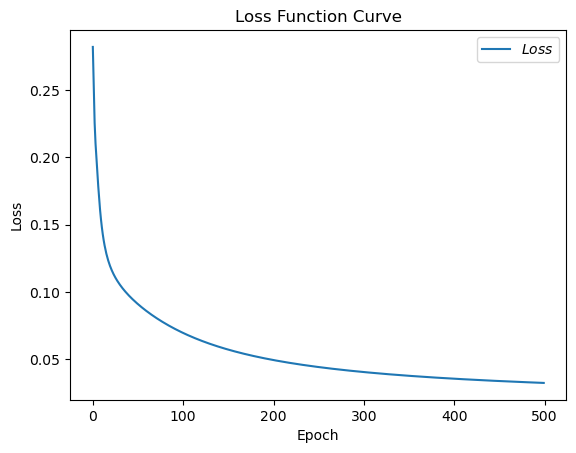

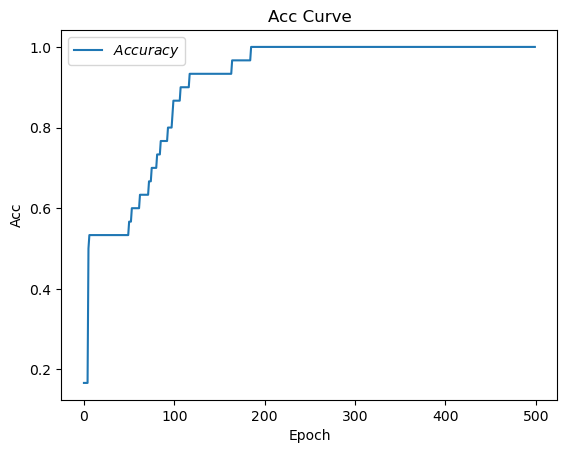

In [2]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
 
# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
 
# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
 
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
 
# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
 
# 生成神经网络的参数，4个输入特征，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))
 
lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和
 
# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])
 
        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新
 
    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备
 
    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##
 
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像
 
# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

#### SGDM 在上一个的基础上增加了一阶动量

Epoch 0, loss: 0.27807747945189476
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.22536178678274155
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.15506046265363693
Test_acc: 0.5333333333333333
--------------------------
Epoch 3, loss: 0.13653301820158958
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.11410546861588955
Test_acc: 0.6
--------------------------
Epoch 5, loss: 0.09060906805098057
Test_acc: 0.9666666666666667
--------------------------
Epoch 6, loss: 0.0879372600466013
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.08889568224549294
Test_acc: 1.0
--------------------------
Epoch 8, loss: 0.0727714579552412
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.07639942038804293
Test_acc: 1.0
--------------------------
Epoch 10, loss: 0.06035615410655737
Test_acc: 0.7333333333333333
--------------------------
Epoch 11, loss: 0.06436267029494047
Test_ac

Epoch 144, loss: 0.022573421709239483
Test_acc: 1.0
--------------------------
Epoch 145, loss: 0.02253508078865707
Test_acc: 1.0
--------------------------
Epoch 146, loss: 0.022497165482491255
Test_acc: 1.0
--------------------------
Epoch 147, loss: 0.02245965600013733
Test_acc: 1.0
--------------------------
Epoch 148, loss: 0.02242253115400672
Test_acc: 1.0
--------------------------
Epoch 149, loss: 0.02238581422716379
Test_acc: 1.0
--------------------------
Epoch 150, loss: 0.022349470760673285
Test_acc: 1.0
--------------------------
Epoch 151, loss: 0.02231349889189005
Test_acc: 1.0
--------------------------
Epoch 152, loss: 0.022277900017797947
Test_acc: 1.0
--------------------------
Epoch 153, loss: 0.022242662962526083
Test_acc: 1.0
--------------------------
Epoch 154, loss: 0.022207775618880987
Test_acc: 1.0
--------------------------
Epoch 155, loss: 0.022173253586515784
Test_acc: 1.0
--------------------------
Epoch 156, loss: 0.022139070322737098
Test_acc: 1.0
-----

Epoch 291, loss: 0.019298733677715063
Test_acc: 1.0
--------------------------
Epoch 292, loss: 0.01928523718379438
Test_acc: 1.0
--------------------------
Epoch 293, loss: 0.019271780038252473
Test_acc: 1.0
--------------------------
Epoch 294, loss: 0.01925843278877437
Test_acc: 1.0
--------------------------
Epoch 295, loss: 0.019245101837441325
Test_acc: 1.0
--------------------------
Epoch 296, loss: 0.019231846323236823
Test_acc: 1.0
--------------------------
Epoch 297, loss: 0.019218676257878542
Test_acc: 1.0
--------------------------
Epoch 298, loss: 0.019205543212592602
Test_acc: 1.0
--------------------------
Epoch 299, loss: 0.019192482344806194
Test_acc: 1.0
--------------------------
Epoch 300, loss: 0.019179485272616148
Test_acc: 1.0
--------------------------
Epoch 301, loss: 0.019166538026183844
Test_acc: 1.0
--------------------------
Epoch 302, loss: 0.019153658766299486
Test_acc: 1.0
--------------------------
Epoch 303, loss: 0.01914084074087441
Test_acc: 1.0
---

Epoch 438, loss: 0.017809808952733874
Test_acc: 1.0
--------------------------
Epoch 439, loss: 0.017802119255065918
Test_acc: 1.0
--------------------------
Epoch 440, loss: 0.01779445237480104
Test_acc: 1.0
--------------------------
Epoch 441, loss: 0.017786833457648754
Test_acc: 1.0
--------------------------
Epoch 442, loss: 0.017779233399778605
Test_acc: 1.0
--------------------------
Epoch 443, loss: 0.017771621234714985
Test_acc: 1.0
--------------------------
Epoch 444, loss: 0.017764083575457335
Test_acc: 1.0
--------------------------
Epoch 445, loss: 0.017756540793925524
Test_acc: 1.0
--------------------------
Epoch 446, loss: 0.017749025719240308
Test_acc: 1.0
--------------------------
Epoch 447, loss: 0.01774153159931302
Test_acc: 1.0
--------------------------
Epoch 448, loss: 0.017734065651893616
Test_acc: 1.0
--------------------------
Epoch 449, loss: 0.01772663276642561
Test_acc: 1.0
--------------------------
Epoch 450, loss: 0.017719196155667305
Test_acc: 1.0
---

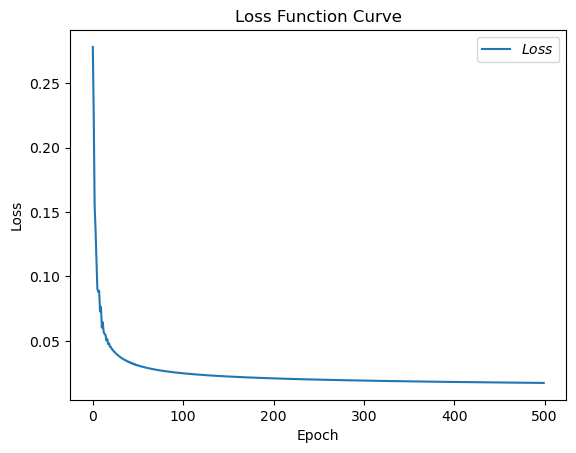

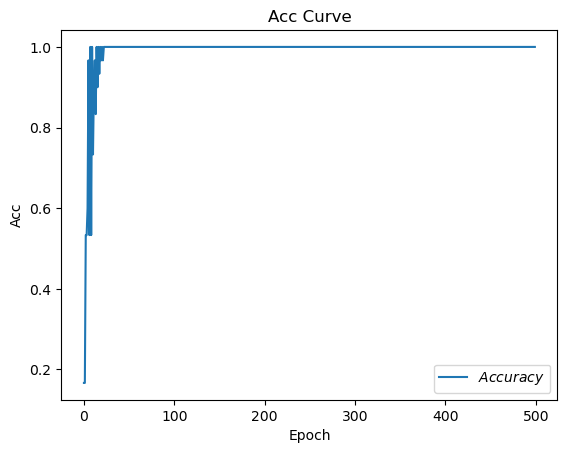

In [3]:
# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
 
# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
 
# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
 
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
 
# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
 
# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))
 
lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和
 
## 设置参数
m_w, m_b,w_v,b_v  = 0, 0,0,0
beta = 0.9

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])
 
    ##########################################################################
        # sgd-momentun  
        w_v = beta * w_v + grads[0]
        b_v = beta * b_v + grads[1]
        # m_w = beta * m_w + (1 - beta) * grads[0]
        # m_b = beta * m_b + (1 - beta) * grads[1]
        w1.assign_sub(lr * w_v)
        b1.assign_sub(lr * b_v)
    ##########################################################################
 
    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备
 
    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##
 
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像
 
# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

#### Adagrad 在SGD的基础上增加了二阶动量

Epoch 0, loss: 0.25288211926817894
Test_acc: 0.5333333333333333
--------------------------
Epoch 1, loss: 0.17822124436497688
Test_acc: 0.5333333333333333
--------------------------
Epoch 2, loss: 0.15621963143348694
Test_acc: 0.5333333333333333
--------------------------
Epoch 3, loss: 0.14205144718289375
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.13362801633775234
Test_acc: 0.5333333333333333
--------------------------
Epoch 5, loss: 0.12754992209374905
Test_acc: 0.5333333333333333
--------------------------
Epoch 6, loss: 0.12287001125514507
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.11908762902021408
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.11591518297791481
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.11317862197756767
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.1107670683413744
Test_acc: 0.5333333333333333
--------------------------

Epoch 135, loss: 0.05129217077046633
Test_acc: 1.0
--------------------------
Epoch 136, loss: 0.05114617757499218
Test_acc: 1.0
--------------------------
Epoch 137, loss: 0.05100161395967007
Test_acc: 1.0
--------------------------
Epoch 138, loss: 0.05085848458111286
Test_acc: 1.0
--------------------------
Epoch 139, loss: 0.050716754980385303
Test_acc: 1.0
--------------------------
Epoch 140, loss: 0.05057641863822937
Test_acc: 1.0
--------------------------
Epoch 141, loss: 0.05043744295835495
Test_acc: 1.0
--------------------------
Epoch 142, loss: 0.05029980279505253
Test_acc: 1.0
--------------------------
Epoch 143, loss: 0.05016348231583834
Test_acc: 1.0
--------------------------
Epoch 144, loss: 0.05002846289426088
Test_acc: 1.0
--------------------------
Epoch 145, loss: 0.0498947249725461
Test_acc: 1.0
--------------------------
Epoch 146, loss: 0.04976225271821022
Test_acc: 1.0
--------------------------
Epoch 147, loss: 0.04963102005422115
Test_acc: 1.0
-------------

Epoch 272, loss: 0.039250198751688004
Test_acc: 1.0
--------------------------
Epoch 273, loss: 0.039196963887661695
Test_acc: 1.0
--------------------------
Epoch 274, loss: 0.039144028909504414
Test_acc: 1.0
--------------------------
Epoch 275, loss: 0.0390913812443614
Test_acc: 1.0
--------------------------
Epoch 276, loss: 0.039039027877151966
Test_acc: 1.0
--------------------------
Epoch 277, loss: 0.038986966479569674
Test_acc: 1.0
--------------------------
Epoch 278, loss: 0.038935184478759766
Test_acc: 1.0
--------------------------
Epoch 279, loss: 0.03888368187472224
Test_acc: 1.0
--------------------------
Epoch 280, loss: 0.0388324623927474
Test_acc: 1.0
--------------------------
Epoch 281, loss: 0.03878151858225465
Test_acc: 1.0
--------------------------
Epoch 282, loss: 0.03873084904626012
Test_acc: 1.0
--------------------------
Epoch 283, loss: 0.038680453319102526
Test_acc: 1.0
--------------------------
Epoch 284, loss: 0.03863032581284642
Test_acc: 1.0
--------

Epoch 410, loss: 0.033899927511811256
Test_acc: 1.0
--------------------------
Epoch 411, loss: 0.033871636260300875
Test_acc: 1.0
--------------------------
Epoch 412, loss: 0.03384344978258014
Test_acc: 1.0
--------------------------
Epoch 413, loss: 0.03381536994129419
Test_acc: 1.0
--------------------------
Epoch 414, loss: 0.03378739207983017
Test_acc: 1.0
--------------------------
Epoch 415, loss: 0.03375953156501055
Test_acc: 1.0
--------------------------
Epoch 416, loss: 0.03373177209869027
Test_acc: 1.0
--------------------------
Epoch 417, loss: 0.03370411181822419
Test_acc: 1.0
--------------------------
Epoch 418, loss: 0.03367655863985419
Test_acc: 1.0
--------------------------
Epoch 419, loss: 0.03364910837262869
Test_acc: 1.0
--------------------------
Epoch 420, loss: 0.03362175961956382
Test_acc: 1.0
--------------------------
Epoch 421, loss: 0.03359451051801443
Test_acc: 1.0
--------------------------
Epoch 422, loss: 0.03356736712157726
Test_acc: 1.0
-----------

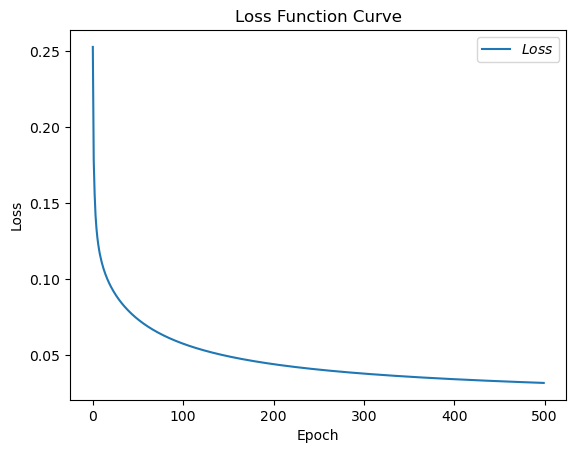

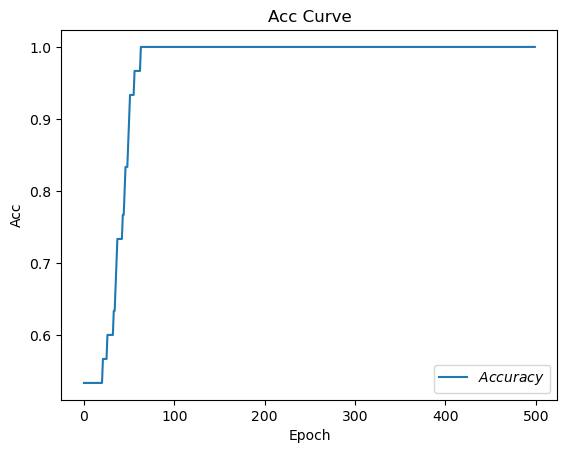

In [5]:
# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
 
# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
 
# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
 
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
 
# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
 
# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))
 
lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和
 
##########################################################################
v_w, v_b = 0, 0
theta=0.00001
##########################################################################
 
# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])
 
        ##########################################################################
        # adagrad
        v_w += tf.square(grads[0])
        v_b += tf.square(grads[1])
        w1.assign_sub(lr * grads[0] / (tf.sqrt(v_w)+theta))
        b1.assign_sub(lr * grads[1] / (tf.sqrt(v_b)+theta))
    ##########################################################################
 
    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备
 
    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##
 
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像
 
# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

#### RMSProp

Epoch 0, loss: 0.44035276025533676
Test_acc: 0.4666666666666667
--------------------------
Epoch 1, loss: 0.46688687801361084
Test_acc: 0.4666666666666667
--------------------------
Epoch 2, loss: 0.47502556443214417
Test_acc: 0.4666666666666667
--------------------------
Epoch 3, loss: 0.46698159724473953
Test_acc: 0.4666666666666667
--------------------------
Epoch 4, loss: 0.46697085350751877
Test_acc: 0.4666666666666667
--------------------------
Epoch 5, loss: 0.4669499322772026
Test_acc: 0.4666666666666667
--------------------------
Epoch 6, loss: 0.46689317375421524
Test_acc: 0.4666666666666667
--------------------------
Epoch 7, loss: 0.4661524295806885
Test_acc: 0.5
--------------------------
Epoch 8, loss: 0.4487304240465164
Test_acc: 0.36666666666666664
--------------------------
Epoch 9, loss: 0.45659707486629486
Test_acc: 0.36666666666666664
--------------------------
Epoch 10, loss: 0.45659707486629486
Test_acc: 0.36666666666666664
--------------------------
Epoch 11, los

Epoch 124, loss: 0.4565970376133919
Test_acc: 0.36666666666666664
--------------------------
Epoch 125, loss: 0.4565970376133919
Test_acc: 0.36666666666666664
--------------------------
Epoch 126, loss: 0.4565970376133919
Test_acc: 0.36666666666666664
--------------------------
Epoch 127, loss: 0.4565970301628113
Test_acc: 0.36666666666666664
--------------------------
Epoch 128, loss: 0.4565970301628113
Test_acc: 0.36666666666666664
--------------------------
Epoch 129, loss: 0.4565970301628113
Test_acc: 0.36666666666666664
--------------------------
Epoch 130, loss: 0.4565970301628113
Test_acc: 0.36666666666666664
--------------------------
Epoch 131, loss: 0.4565970301628113
Test_acc: 0.36666666666666664
--------------------------
Epoch 132, loss: 0.4565970301628113
Test_acc: 0.36666666666666664
--------------------------
Epoch 133, loss: 0.4565970301628113
Test_acc: 0.36666666666666664
--------------------------
Epoch 134, loss: 0.4565970301628113
Test_acc: 0.36666666666666664
----

Epoch 253, loss: 0.456596739590168
Test_acc: 0.36666666666666664
--------------------------
Epoch 254, loss: 0.456596739590168
Test_acc: 0.36666666666666664
--------------------------
Epoch 255, loss: 0.4565967321395874
Test_acc: 0.36666666666666664
--------------------------
Epoch 256, loss: 0.4565967097878456
Test_acc: 0.36666666666666664
--------------------------
Epoch 257, loss: 0.456596702337265
Test_acc: 0.36666666666666664
--------------------------
Epoch 258, loss: 0.456596702337265
Test_acc: 0.36666666666666664
--------------------------
Epoch 259, loss: 0.456596702337265
Test_acc: 0.36666666666666664
--------------------------
Epoch 260, loss: 0.4565966948866844
Test_acc: 0.36666666666666664
--------------------------
Epoch 261, loss: 0.4565966799855232
Test_acc: 0.36666666666666664
--------------------------
Epoch 262, loss: 0.4565966799855232
Test_acc: 0.36666666666666664
--------------------------
Epoch 263, loss: 0.4565966725349426
Test_acc: 0.36666666666666664
---------

Epoch 383, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 384, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 385, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 386, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 387, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 388, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 389, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 390, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 391, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 392, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
--------------------------
Epoch 393, loss: 0.2569444477558136
Test_acc: 0.8333333333333334
---------------

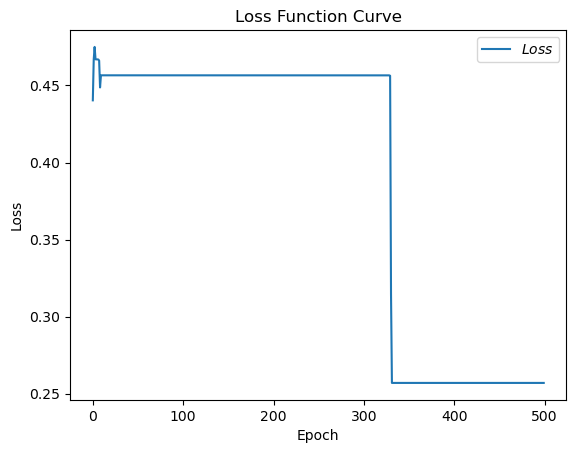

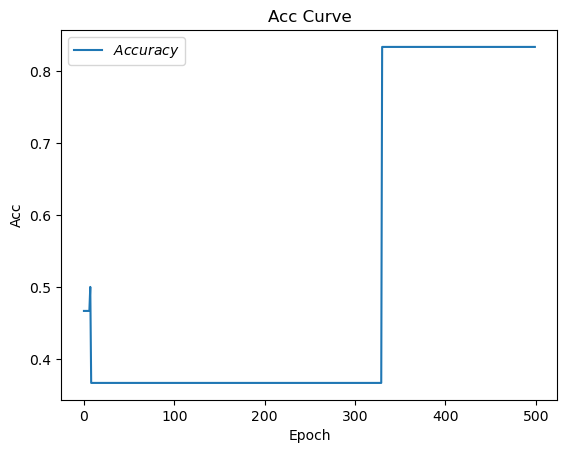

In [8]:
# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
 
# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
 
# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
 
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
 
# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
 
# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))
 
lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和
 
##########################################################################
v_w, v_b = 0, 0
beta = 0.999
theta=0.00001
##########################################################################
 
# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])
 
        ##########################################################################
        # rmsprop
        v_w = beta * v_w + (1 - beta) * tf.square(grads[0])
        v_b = beta * v_b + (1 - beta) * tf.square(grads[1])
        w1.assign_sub(lr * grads[0] /(tf.sqrt(v_w)+theta))
        b1.assign_sub(lr * grads[1] / (tf.sqrt(v_b)+theta))
    ##########################################################################
 
    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备
 
    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##
 
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像
 
# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

#### Adam算法

Epoch 0, loss: 0.21984169632196426
Test_acc: 0.5333333333333333
--------------------------
Epoch 1, loss: 0.14480621553957462
Test_acc: 0.5333333333333333
--------------------------
Epoch 2, loss: 0.10274341888725758
Test_acc: 0.6666666666666666
--------------------------
Epoch 3, loss: 0.089221665635705
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.08600791357457638
Test_acc: 0.9
--------------------------
Epoch 5, loss: 0.06994976568967104
Test_acc: 0.8
--------------------------
Epoch 6, loss: 0.06724478024989367
Test_acc: 0.8
--------------------------
Epoch 7, loss: 0.06104545295238495
Test_acc: 1.0
--------------------------
Epoch 8, loss: 0.055738057009875774
Test_acc: 0.9333333333333333
--------------------------
Epoch 9, loss: 0.05405292473733425
Test_acc: 1.0
--------------------------
Epoch 10, loss: 0.049091923981904984
Test_acc: 1.0
--------------------------
Epoch 11, loss: 0.04825871344655752
Test_acc: 1.0
--------------------------
Epoch 12, l

Epoch 137, loss: 0.017623004037886858
Test_acc: 1.0
--------------------------
Epoch 138, loss: 0.017592068994417787
Test_acc: 1.0
--------------------------
Epoch 139, loss: 0.017561487620696425
Test_acc: 1.0
--------------------------
Epoch 140, loss: 0.01753122895024717
Test_acc: 1.0
--------------------------
Epoch 141, loss: 0.017501325579360127
Test_acc: 1.0
--------------------------
Epoch 142, loss: 0.017471769358962774
Test_acc: 1.0
--------------------------
Epoch 143, loss: 0.017442524898797274
Test_acc: 1.0
--------------------------
Epoch 144, loss: 0.01741360779851675
Test_acc: 1.0
--------------------------
Epoch 145, loss: 0.017385012237355113
Test_acc: 1.0
--------------------------
Epoch 146, loss: 0.017356721218675375
Test_acc: 1.0
--------------------------
Epoch 147, loss: 0.017328756162896752
Test_acc: 1.0
--------------------------
Epoch 148, loss: 0.017301081214100122
Test_acc: 1.0
--------------------------
Epoch 149, loss: 0.01727368193678558
Test_acc: 1.0
---

Epoch 244, loss: 0.015549276140518486
Test_acc: 1.0
--------------------------
Epoch 245, loss: 0.01553719851654023
Test_acc: 1.0
--------------------------
Epoch 246, loss: 0.015525184571743011
Test_acc: 1.0
--------------------------
Epoch 247, loss: 0.015513289254158735
Test_acc: 1.0
--------------------------
Epoch 248, loss: 0.015501466463319957
Test_acc: 1.0
--------------------------
Epoch 249, loss: 0.015489712706767023
Test_acc: 1.0
--------------------------
Epoch 250, loss: 0.015478044049814343
Test_acc: 1.0
--------------------------
Epoch 251, loss: 0.015466455137357116
Test_acc: 1.0
--------------------------
Epoch 252, loss: 0.015454945736564696
Test_acc: 1.0
--------------------------
Epoch 253, loss: 0.015443528885953128
Test_acc: 1.0
--------------------------
Epoch 254, loss: 0.015432167099788785
Test_acc: 1.0
--------------------------
Epoch 255, loss: 0.015420907060615718
Test_acc: 1.0
--------------------------
Epoch 256, loss: 0.015409693238325417
Test_acc: 1.0
-

Epoch 352, loss: 0.014601105242036283
Test_acc: 1.0
--------------------------
Epoch 353, loss: 0.014594768057577312
Test_acc: 1.0
--------------------------
Epoch 354, loss: 0.014588487916626036
Test_acc: 1.0
--------------------------
Epoch 355, loss: 0.014582210686057806
Test_acc: 1.0
--------------------------
Epoch 356, loss: 0.014575984445400536
Test_acc: 1.0
--------------------------
Epoch 357, loss: 0.014569778693839908
Test_acc: 1.0
--------------------------
Epoch 358, loss: 0.014563609613105655
Test_acc: 1.0
--------------------------
Epoch 359, loss: 0.014557466609403491
Test_acc: 1.0
--------------------------
Epoch 360, loss: 0.0145513677271083
Test_acc: 1.0
--------------------------
Epoch 361, loss: 0.014545278740115464
Test_acc: 1.0
--------------------------
Epoch 362, loss: 0.014539237599819899
Test_acc: 1.0
--------------------------
Epoch 363, loss: 0.01453323953319341
Test_acc: 1.0
--------------------------
Epoch 364, loss: 0.01452724146656692
Test_acc: 1.0
----

Epoch 457, loss: 0.01407751557417214
Test_acc: 1.0
--------------------------
Epoch 458, loss: 0.01407361007295549
Test_acc: 1.0
--------------------------
Epoch 459, loss: 0.014069723198190331
Test_acc: 1.0
--------------------------
Epoch 460, loss: 0.014065850293263793
Test_acc: 1.0
--------------------------
Epoch 461, loss: 0.014061980531550944
Test_acc: 1.0
--------------------------
Epoch 462, loss: 0.01405815256293863
Test_acc: 1.0
--------------------------
Epoch 463, loss: 0.014054322033189237
Test_acc: 1.0
--------------------------
Epoch 464, loss: 0.014050511177629232
Test_acc: 1.0
--------------------------
Epoch 465, loss: 0.014046714291907847
Test_acc: 1.0
--------------------------
Epoch 466, loss: 0.014042933820746839
Test_acc: 1.0
--------------------------
Epoch 467, loss: 0.014039161498658359
Test_acc: 1.0
--------------------------
Epoch 468, loss: 0.014035419910214841
Test_acc: 1.0
--------------------------
Epoch 469, loss: 0.014031679718755186
Test_acc: 1.0
---

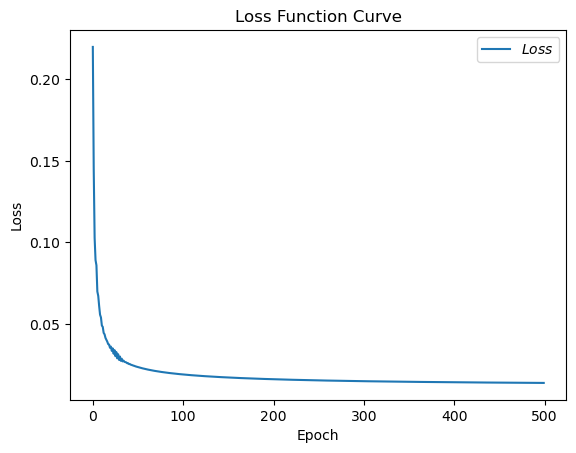

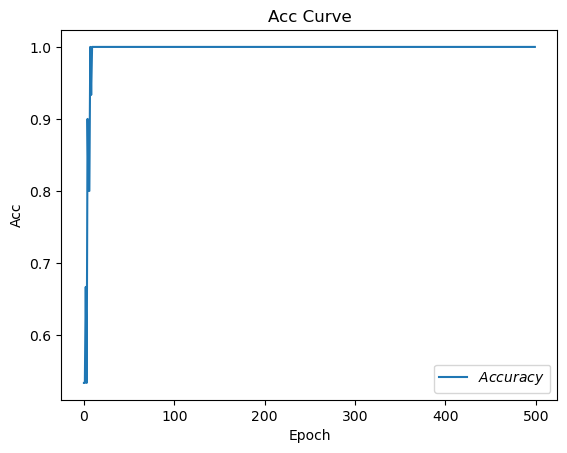

In [9]:
# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
 
# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
 
# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
 
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
 
# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
 
# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))
 
lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和
 
##########################################################################
m_w, m_b = 0, 0
v_w, v_b = 0, 0
beta1, beta2 = 0.9, 0.999
delta_w, delta_b = 0, 0
global_step = 0
##########################################################################
 
# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
 ##########################################################################       
        global_step += 1
 ##########################################################################       
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])
 
 ##########################################################################
 # adam
        # 累计梯度
        m_w = beta1 * m_w + (1 - beta1) * grads[0]
        m_b = beta1 * m_b + (1 - beta1) * grads[1]
        # 累计平方梯度
        v_w = beta2 * v_w + (1 - beta2) * tf.square(grads[0])
        v_b = beta2 * v_b + (1 - beta2) * tf.square(grads[1])
         # 修正偏差，避免冷启动的问题
        m_w_correction = m_w / (1 - tf.pow(beta1, int(global_step)))
        m_b_correction = m_b / (1 - tf.pow(beta1, int(global_step)))
        v_w_correction = v_w / (1 - tf.pow(beta2, int(global_step)))
        v_b_correction = v_b / (1 - tf.pow(beta2, int(global_step)))
         # 更新权重
        w1.assign_sub(lr * m_w_correction / tf.sqrt(v_w_correction))
        b1.assign_sub(lr * m_b_correction / tf.sqrt(v_b_correction))
##########################################################################
 
    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备
 
    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##
 
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像
 
# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()